The covariance matrix is given by the matrix inversion lemma (also known as the Woodbury matrix identity). 

The expression is:

$ C_{\theta | Y} = (C_{\theta\theta}^{-1} + H^T C_{VV}^{-1} H)^{-1} $

The covariance matrix in a Bayesian linear regression context.

In [1]:
using FFTW

In [2]:
include("operations.jl");

In [3]:
using LinearAlgebra
using Distributions

# Simulated data
Y = [1.0, 2.0, 3.0]
H = [1.0; 2.0; 3.0]

# Prior covariance matrix (assuming it's a diagonal matrix for simplicity)
c₀₀ = Diagonal([1.0])

# Likelihood (assuming Gaussian errors)
cᵥᵥ = 0.1 * I; cᵥᵥ⁻¹ = inv(cᵥᵥ)

UniformScaling{Float64}
10.0*I

In [4]:
# Bayesian update to calculate posterior covariance
# Using Transpose Matrix Hᵀ (3x1)
c₀ₗᵥ = ((c₀₀)⁻¹ .+ (H)ᵀ *  cᵥᵥ⁻¹ .* H)⁻¹

3×1 Matrix{Float64}:
 0.09090909090909091
 0.024390243902439025
 0.01098901098901099

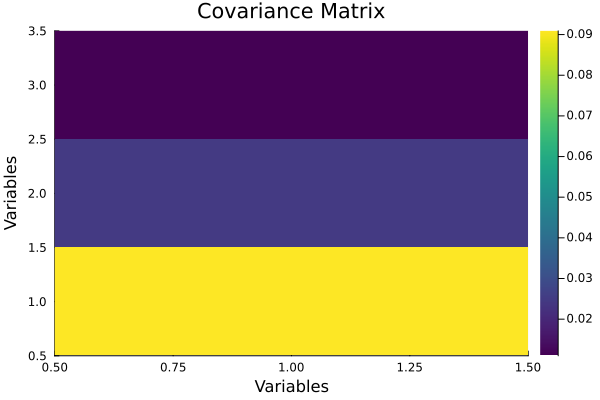

In [5]:
using Plots

# Plotting the covariance matrix as a heatmap
heatmap(c₀ₗᵥ, xlabel="Variables", ylabel="Variables", title="Covariance Matrix", c=:viridis)


In [11]:
# Bayesian update to calculate posterior covariance
# Using Ajoint Matrix H' (3x3)
c₀ₗᵥᵃ = ((c₀₀)⁻¹ .+ H' *  cᵥᵥ⁻¹ .* H)⁻¹

3×3 Matrix{Float64}:
 0.0909091  0.047619   0.0322581
 0.047619   0.0243902  0.0163934
 0.0322581  0.0163934  0.010989

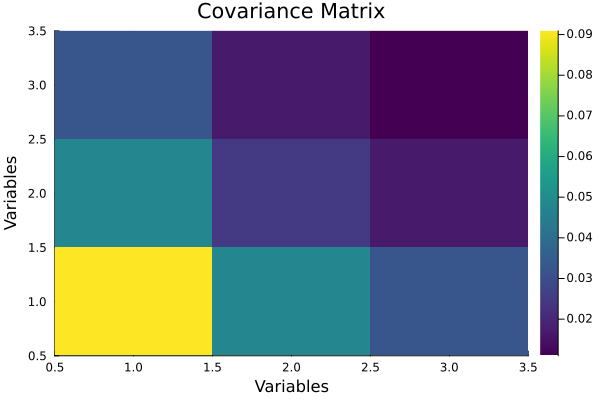

In [12]:
# Plotting the covariance matrix as a heatmap
heatmap(c₀ₗᵥᵃ, xlabel="Variables", ylabel="Variables", title="Covariance Matrix", c=:viridis)